# Summary data

In [21]:
%matplotlib notebook

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
percentGrowthHDI = pd.read_csv("./Datasets/percentGrowthHDI.csv", index_col = 0)
print(percentGrowthHDI.shape)
percentGrowthHDI.rename(columns={
    'Region':'State',
    '2017': "HDI 2017",
    'last year growth': "% HDI growth"
},
                        inplace=True)

percentGrowthHDI["State"][9] = "Ciudad de Mexico"
percentGrowthHDI["State"][7] = "Coahuila de Zaragoza"
percentGrowthHDI["State"][15] = "Mexico."
percentGrowthHDI["State"][30] = "Veracruz de Ignacio de la Llave"
percentGrowthHDI.head()


(32, 3)


C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

,State,HDI 2017,% HDI growth
1,Aguascalientes,0.794,0.252525
2,Baja California,0.803,0.249688
3,Baja California Sur,0.811,0.247219
4,Campeche,0.762,0.131406
5,Chiapas,0.700,0.286533


In [24]:
BancosVf = pd.read_csv("./Datasets/BancosVf.csv", index_col = 0)
print(BancosVf.shape)
BancosVf["State"][6] = "Ciudad de Mexico"
BancosVf["State"][7] = "Coahuila de Zaragoza"
BancosVf["State"][14] = "Mexico."
BancosVf["State"][29] = "Veracruz de Ignacio de la Llave"

cols = BancosVf.select_dtypes(include=[np.object]).columns
BancosVf[cols] = BancosVf[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

(32, 9)


C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [7]:
BancosVf.head()

,State,Crec. ATMs,Crec. Transacciones por Celular,Crec. Tarjetas de Credito,Crec. Surcursales,Cant. ATMs,Cant.Transacciones por Celular,Cant. Tarjetas de Credito,Cant. Surcursales
0,Aguascalientes,8.193980,66.639509,-3.588463,3.906250,647,257708,276919,133
1,Baja California,9.808853,51.534102,-4.822147,0.529101,2183,927813,770479,380
2,Baja California Sur,8.052434,47.812462,-3.498855,0.869565,577,218387,187963,116
3,Campeche,3.296703,46.072058,-4.086440,-4.000000,376,199067,137635,96
4,Chiapas,7.411908,43.585872,-12.307624,1.581028,884,614358,374585,257


In [25]:
educationStatsPerState = pd.read_csv("./Datasets/TopEducationPerState.csv", index_col = 0)
print(educationStatsPerState.shape)
educationStatsPerState['Entidad federativa'] = [row[3:] for row in educationStatsPerState['Entidad federativa']]

educationStatsPerState.rename(columns={
    'Entidad federativa':'State',
    'Educación media superior2': "HighSchool %",
    'Educación superior3': "College and higher %",
    "Grado promedio de escolaridad": "AvgLvlSchooling"
},
                        inplace=True)

cols = educationStatsPerState.select_dtypes(include=[np.object]).columns
educationStatsPerState[cols] = educationStatsPerState[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
educationStatsPerState["State"][14] = "Mexico."

educationStatsPerState.head()

(32, 4)


C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,State,HighSchool %,College and higher %,AvgLvlSchooling
0,Aguascalientes,21.845141,20.670093,9.725975
1,Baja California,25.462602,19.384175,9.757418
2,Baja California Sur,27.366328,21.051714,9.905535
3,Campeche,20.279518,20.309485,9.138454
4,Coahuila de Zaragoza,21.443746,21.505499,9.897388


In [26]:
internetPenetration = pd.read_csv("./Datasets/Internet penetration.csv")
internetPenetration.rename(columns={
    'ENTIDAD':'State',
    'P_BAF_E': "% penetretation"
},
                        inplace=True)
internetPenetration = internetPenetration.loc[:,['State', '% penetretation']]

print(internetPenetration.shape)
internetPenetration.head()

(32, 2)


,State,% penetretation
0,Aguascalientes,54
1,Baja California,75
2,Baja California Sur,65
3,Campeche,25
4,Coahuila de Zaragoza,45


In [27]:
mainDataframe = internetPenetration.merge(percentGrowthHDI, on='State')
mainDataframe = mainDataframe.merge(BancosVf, on='State')
mainDataframe = mainDataframe.merge(educationStatsPerState, on='State')

mainDataframe["y"] = 0
mainDataframe["y"][8] = 1
mainDataframe["y"][13] = 1
# mainDataframe["y"][14] = 1
mainDataframe["y"][18] = 1

print(mainDataframe.shape)
mainDataframe.to_csv("./Datasets/summaryData.csv")

mainDataframe

(32, 16)


C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\usuario\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,State,% penetretation,HDI 2017,% HDI growth,Crec. ATMs,Crec. Transacciones por Celular,Crec. Tarjetas de Credito,Crec. Surcursales,Cant. ATMs,Cant.Transacciones por Celular,Cant. Tarjetas de Credito,Cant. Surcursales,HighSchool %,College and higher %,AvgLvlSchooling,y
0,Aguascalientes,54,0.794,0.252525,8.193980,66.639509,-3.588463,3.906250,647,257708,276919,133,21.845141,20.670093,9.725975,0
1,Baja California,75,0.803,0.249688,9.808853,51.534102,-4.822147,0.529101,2183,927813,770479,380,25.462602,19.384175,9.757418,0
2,Baja California Sur,65,0.811,0.247219,8.052434,47.812462,-3.498855,0.869565,577,218387,187963,116,27.366328,21.051714,9.905535,0
3,Campeche,25,0.762,0.131406,3.296703,46.072058,-4.086440,-4.000000,376,199067,137635,96,20.279518,20.309485,9.138454,0
4,Coahuila de Zaragoza,45,0.799,0.250941,5.063291,53.476522,-2.328279,-0.576369,1826,648182,575137,345,21.443746,21.505499,9.897388,0
5,Colima,60,0.783,0.256082,4.956268,62.238774,-7.928304,-1.041667,360,168154,175113,95,21.719290,22.029623,9.528720,0
6,Chiapas,18,0.700,0.286533,7.411908,43.585872,-12.307624,1.581028,884,614358,374585,257,16.375695,11.700822,7.288581,0
7,Chihuahua,54,0.793,0.252845,8.880517,60.915181,1.792164,0.755668,2023,810887,770812,400,21.431446,18.837425,9.466591,0
8,Ciudad de Mexico,97,0.830,0.241546,7.016861,79.570476,0.946098,-0.167038,8251,5143333,5862909,1793,26.623140,32.137140,11.119587,1
9,Durango,39,0.775,0.258732,5.802048,43.382341,-7.071453,0.757576,620,345626,242813,133,20.202632,16.672646,9.147610,0


In [52]:
# mainDataframe.nlargest(1, "% penetretation")["State"]
# for columnName in mainDataframe.set_index("State").columns.tolist():
#     print(columnName)
#     print(mainDataframe.nlargest(8, columnName)["State"])
#     print("-----------------")
#     print(f"category: {columnName} winner: {str(mainDataframe.nlargest(1, columnName)["State"])}")

In [28]:
from sklearn import linear_model
import statsmodels.api as sm
df = mainDataframe

In [29]:
columnsList = df.columns.tolist()
del columnsList[0]
del columnsList[-1]
columnsList

['% penetretation',
 'HDI 2017',
 '% HDI growth',
 'Crec. ATMs',
 'Crec. Transacciones por Celular',
 'Crec. Tarjetas de Credito',
 'Crec. Surcursales',
 'Cant. ATMs',
 'Cant.Transacciones por Celular',
 'Cant. Tarjetas de Credito',
 'Cant. Surcursales',
 'HighSchool %',
 'College and higher %',
 'AvgLvlSchooling']

In [30]:
# X = df[['Cant. Tarjetas de Credito','Crec. Transacciones por Celular']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
X= df[columnsList]
Y = df['y']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.762511067738768
Coefficients: 
 [ 2.46186357e-03  1.61934641e-01  8.39308702e-01 -8.80734867e-03
  5.07765541e-03 -8.41786866e-04 -6.27929625e-03 -5.66366204e-05
  2.92598086e-07 -5.35098731e-07  1.45039616e-03 -3.02085814e-02
  3.66572451e-02 -8.77901814e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3.397
Date:                Fri, 05 Apr 2019   Prob (F-statistic):            0.00938
Time:                        23:17:12   Log-Likelihood:                 15.392
No. Observations:                  32   AIC:                           -0.7846
Df Residuals:                      17   BIC:                             21.20
Df Model:                          14                                         
Covariance T

In [31]:
mainDataframeT = mainDataframe.set_index("State").T
mainDataframeT
# mainDataframeT["y coef"] = model.params

State,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila de Zaragoza,Colima,Chiapas,Chihuahua,Ciudad de Mexico,Durango,...,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatan,Zacatecas
% penetretation,54.000000,75.000000,65.000000,25.000000,45.000000,60.000000,18.000000,54.000000,9.700000e+01,39.000000,...,59.000000,40.000000,53.000000,61.000000,24.000000,42.000000,36.000000,3.700000e+01,45.000000,37.000000
HDI 2017,0.794000,0.803000,0.811000,0.762000,0.799000,0.783000,0.700000,0.793000,8.300000e-01,0.775000,...,0.781000,0.757000,0.804000,0.806000,0.773000,0.792000,0.770000,7.440000e-01,0.773000,0.760000
% HDI growth,0.252525,0.249688,0.247219,0.131406,0.250941,0.256082,0.286533,0.252845,2.415459e-01,0.258732,...,0.256739,0.264901,0.124533,0.248756,0.389610,0.253165,0.260417,2.695418e-01,0.259403,0.263852
Crec. ATMs,8.193980,9.808853,8.052434,3.296703,5.063291,4.956268,7.411908,8.880517,7.016861e+00,5.802048,...,5.630936,8.286674,8.305921,7.204611,7.617729,6.345733,7.467532,4.402772e+00,10.290557,7.881773
Crec. Transacciones por Celular,66.639509,51.534102,47.812462,46.072058,53.476522,62.238774,43.585872,60.915181,7.957048e+01,43.382341,...,70.355463,39.910126,39.335007,36.664399,45.163528,60.383448,49.486895,3.285752e+01,38.552344,45.859057
Crec. Tarjetas de Credito,-3.588463,-4.822147,-3.498855,-4.086440,-2.328279,-7.928304,-12.307624,1.792164,9.460981e-01,-7.071453,...,5.492987,5.568988,7.629246,11.001860,11.511485,9.218114,21.855037,1.829269e+01,-5.663976,-14.359852
Crec. Surcursales,3.906250,0.529101,0.869565,-4.000000,-0.576369,-1.041667,1.581028,0.755668,-1.670379e-01,0.757576,...,7.729469,-0.442478,1.704545,-0.294118,-0.462963,0.746269,0.000000,-1.994302e+00,1.731602,0.000000
Cant. ATMs,647.000000,2183.000000,577.000000,376.000000,1826.000000,360.000000,884.000000,2023.000000,8.251000e+03,620.000000,...,1557.000000,967.000000,1317.000000,1488.000000,777.000000,1944.000000,331.000000,2.561000e+03,911.000000,438.000000
Cant.Transacciones por Celular,257708.000000,927813.000000,218387.000000,199067.000000,648182.000000,168154.000000,614358.000000,810887.000000,5.143333e+06,345626.000000,...,473595.000000,358051.000000,719395.000000,833605.000000,508518.000000,764256.000000,184271.000000,1.425706e+06,375233.000000,199401.000000
Cant. Tarjetas de Credito,276919.000000,770479.000000,187963.000000,137635.000000,575137.000000,175113.000000,374585.000000,770812.000000,5.862909e+06,242813.000000,...,393127.000000,452797.000000,799272.000000,691122.000000,376804.000000,790145.000000,200666.000000,1.567707e+06,413971.000000,180699.000000


In [32]:
(mainDataframeT["Chiapas"][0:-1])

% penetretation                        18.000000
HDI 2017                                0.700000
% HDI growth                            0.286533
Crec. ATMs                              7.411908
Crec. Transacciones por Celular        43.585872
Crec. Tarjetas de Credito             -12.307624
Crec. Surcursales                       1.581028
Cant. ATMs                            884.000000
Cant.Transacciones por Celular     614358.000000
Cant. Tarjetas de Credito          374585.000000
Cant. Surcursales                     257.000000
HighSchool %                           16.375695
College and higher %                   11.700822
AvgLvlSchooling                         7.288581
Name: Chiapas, dtype: float64

In [33]:
model.params[1:]

% penetretation                    2.461864e-03
HDI 2017                           1.619346e-01
% HDI growth                       8.393087e-01
Crec. ATMs                        -8.807349e-03
Crec. Transacciones por Celular    5.077655e-03
Crec. Tarjetas de Credito         -8.417869e-04
Crec. Surcursales                 -6.279296e-03
Cant. ATMs                        -5.663662e-05
Cant.Transacciones por Celular     2.925981e-07
Cant. Tarjetas de Credito         -5.350987e-07
Cant. Surcursales                  1.450396e-03
HighSchool %                      -3.020858e-02
College and higher %               3.665725e-02
AvgLvlSchooling                   -8.779018e-03
dtype: float64

In [34]:
print(model.params.shape)
print(mainDataframeT["Ciudad de Mexico"].shape)
model.params[1:]
mainDataframeT["Ciudad de Mexico"][0:-1]
(model.params[1:] * mainDataframeT["Ciudad de Mexico"][0:-1]).sum()

(15,)
(15,)


1.6955605101122877

In [35]:
print(model.params.shape)
print(mainDataframeT["Chiapas"].shape)
model.params[1:]
mainDataframeT["Chiapas"][0:-1]
(model.params[1:] * mainDataframeT["Chiapas"][0:-1]).sum()

(15,)
(15,)


0.7268766976740919

In [75]:
statesResult = {}
for column in mainDataframeT:
    statesResult[column] = [(model.params[1:] * mainDataframeT[column][0:-1]).sum()]
#     print(column)
#     print((model.params[1:] * mainDataframeT[column][0:-1]).sum())
#     print("--------------------------------")

statesResultDataframe = pd.DataFrame(statesResult).T
statesResultDataframe.head()

,0
Aguascalientes,0.814059
Baja California,0.842685
Baja California Sur,0.625109
Campeche,0.682880
Coahuila de Zaragoza,1.015835


In [43]:
pd.DataFrame(statesResult).T.nlargest(8, 0)

,0
Ciudad de Mexico,1.695561
Nuevo Leon,1.489433
Jalisco,1.386600
Puebla,1.020521
Coahuila de Zaragoza,1.015835
Mexico.,0.981316
Queretaro,0.966698
Chihuahua,0.948801


In [38]:
import geopandas

In [84]:
# df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
geoStatesDataframe = geopandas.read_file("./geodata/mapEstatalLigero.shx")
geoStatesDataframe.head()

,CVE_ENT,NOM_ENT,geometry
0,01,Aguascalientes,POLYGON ((-102.2878651798373 22.41649005049138...
1,02,Baja California,(POLYGON ((-112.663839812965 28.41882990629279...
2,03,Baja California Sur,"(POLYGON ((-109.894505644716 22.8747583739014,..."
3,04,Campeche,(POLYGON ((-91.9564965202393 20.19699502051303...
4,05,Coahuila de Zaragoza,POLYGON ((-102.3107926499819 29.87694857030019...


In [85]:
# geoStatesDataframe.join(statesResultDataframe)
geoStatesDataframe = pd.concat([geoStatesDataframe, statesResultDataframe.reset_index()], axis=1)
geoStatesDataframe[0] = geoStatesDataframe[0] ** 2
geoStatesDataframe.head()

,CVE_ENT,NOM_ENT,geometry,index,0
0,01,Aguascalientes,POLYGON ((-102.2878651798373 22.41649005049138...,Aguascalientes,0.662692
1,02,Baja California,(POLYGON ((-112.663839812965 28.41882990629279...,Baja California,0.710119
2,03,Baja California Sur,"(POLYGON ((-109.894505644716 22.8747583739014,...",Baja California Sur,0.390761
3,04,Campeche,(POLYGON ((-91.9564965202393 20.19699502051303...,Campeche,0.466324
4,05,Coahuila de Zaragoza,POLYGON ((-102.3107926499819 29.87694857030019...,Coahuila de Zaragoza,1.031920


<IPython.core.display.Javascript object>


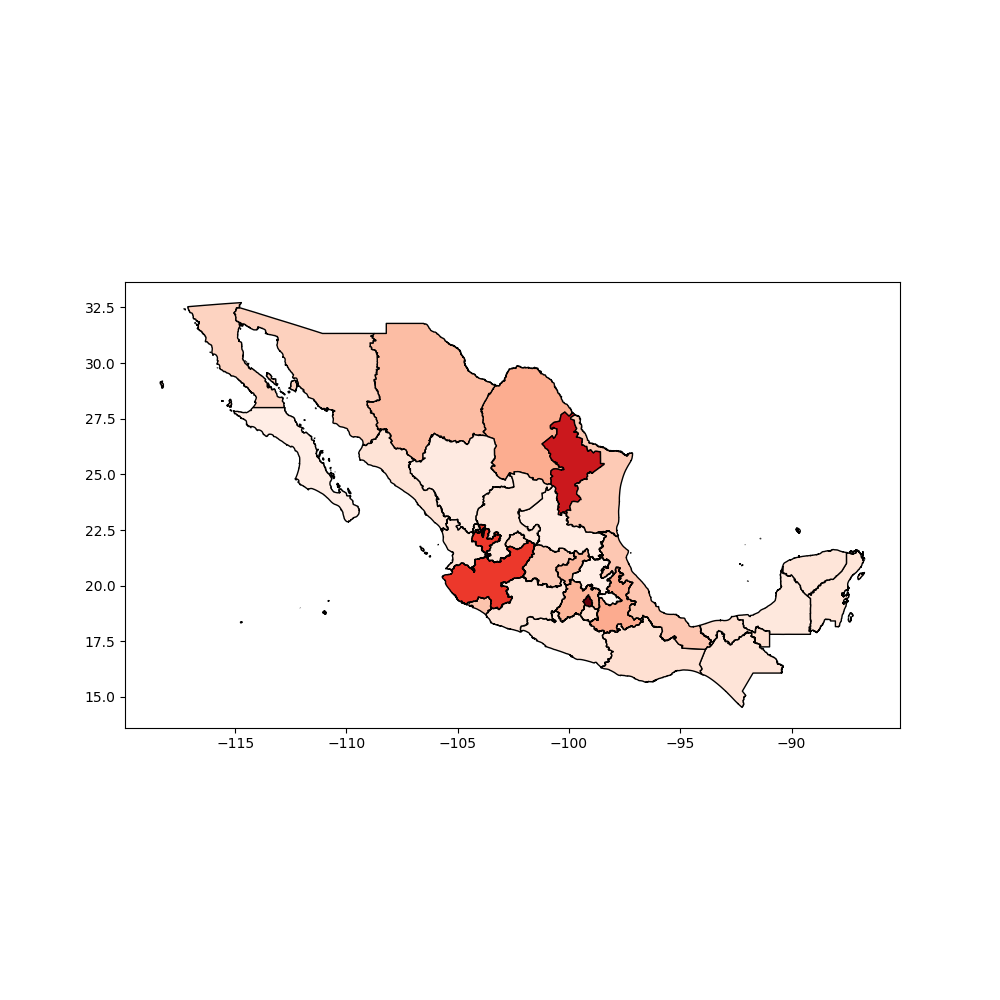

In [86]:
ax = geoStatesDataframe.plot(figsize=(10, 10),  edgecolor='k', column=0, cmap='Reds')